In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Загрузка данных
data = pd.read_csv("Zadanie_1.csv")

# Выбираем факторные признаки (числовые признаки)
numeric_features = [
    "na_sales",
    "eu_sales",
    "other_sales",

]

# Выбираем категориальные признаки для кодирования
categorical_features = [
    "year",
    "platform",
    "genre",
	"publisher",
]


# Применяем One-Hot Encoding к категориальным признакам
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[categorical_features])

# Соединяем числовые и закодированные категориальные признаки
X = pd.concat([data[numeric_features], pd.DataFrame(encoded_features.toarray())], axis=1)

# Добавим константный признак для обучения свободного члена модели
X['const'] = 1

# Отдельно выбираем результативный признак (jp_sales)
y = data["jp_sales"]

""" # Добавление логарифмов, квадратов и кубов числовых признаков
for feature in numeric_features:
    # Проверка на нулевые значения перед вычислением логарифмов
    if (X[feature] != 0).any():
        X[f"{feature}_log"] = 0  # Заменяем нули на ноль в логарифмах
    else:
        X[f"{feature}_log"] = np.log(X[feature])
    X[f"{feature}_squared"] = X[feature] ** 2
    X[f"{feature}_cubed"] = X[feature] ** 3 """


# Создаем объект StandardScaler
scaler = StandardScaler()

# Стандартизируем числовые признаки
X[numeric_features] = scaler.fit_transform(X[numeric_features])

""" # Стандартизируем все новые добавленные колонки
for feature in numeric_features:
    X[f"{feature}_log"] = scaler.fit_transform(X[[f"{feature}_log"]])
    X[f"{feature}_squared"] = scaler.fit_transform(X[[f"{feature}_squared"]])
    X[f"{feature}_cubed"] = scaler.fit_transform(X[[f"{feature}_cubed"]]) """

' # Стандартизируем все новые добавленные колонки\nfor feature in numeric_features:\n    X[f"{feature}_log"] = scaler.fit_transform(X[[f"{feature}_log"]])\n    X[f"{feature}_squared"] = scaler.fit_transform(X[[f"{feature}_squared"]])\n    X[f"{feature}_cubed"] = scaler.fit_transform(X[[f"{feature}_cubed"]]) '

In [70]:
import numpy as np


class MultipleRegression:

    def __init__(self, learning_rate=0.1, n_iterations=100):
        
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = np.zeros(X.shape[1])

    def calculate_gradient(self, X, y):

        n_samples = X.shape[0]
        y_pred = X.dot(self.weights)
        error = y_pred - y
        gradient = X.T.dot(error) / n_samples
        return gradient
    
    def fit(self, X, y):

        for _ in range(self.n_iterations):
            gradient = self.calculate_gradient(X, y)
            self.weights -= self.learning_rate * gradient

        
    def predict(self, X):

        return X.dot(self.weights)

# Создаем и обучаем модель
model = MultipleRegression()
model.fit(X, y)

# Делаем окончательные прогнозы для jp_sales
y_pred = model.predict(X)

# Вычисляем MAE и MAPE 
mae = np.mean(np.abs(y - y_pred))
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
#print(model.weights)


Mean Absolute Error (MAE): 0.17797222675231344
Mean Absolute Percentage Error (MAPE): 12.317267874951058


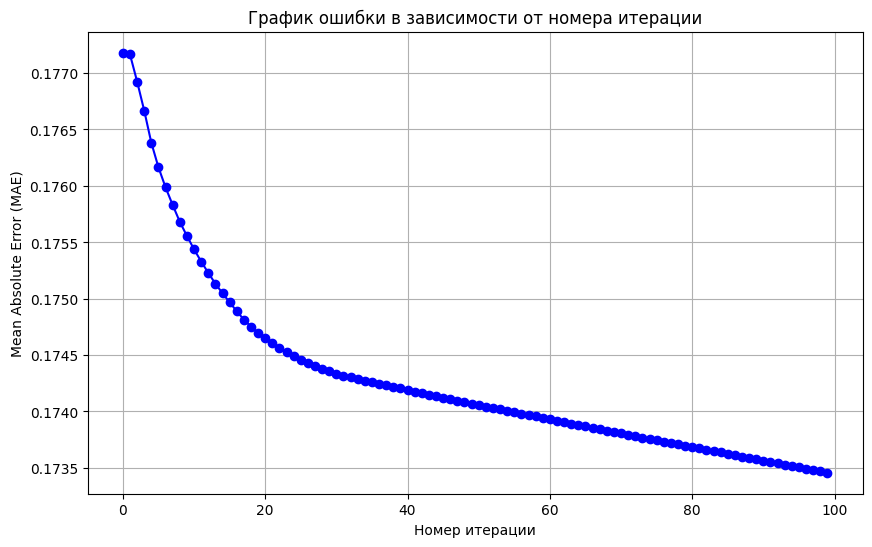

In [71]:
import matplotlib.pyplot as plt


# Списки для сохранения значений ошибки и номера итерации
errors = []
iterations = []

# Обучение модели и сохранение ошибки на каждой итерации
for i in range(model.n_iterations):
    model.fit(X, y)  # Обучение модели
    y_pred = model.predict(X)  # Предсказание
    mae = np.mean(np.abs(y - y_pred))  # Вычисление MAE
    errors.append(mae)  # Сохранение ошибки
    iterations.append(i)  # Сохранение номера итерации

# Построение графика ошибки
plt.figure(figsize=(10, 6))
plt.plot(iterations, errors, marker='o', linestyle='-', color='b')
plt.xlabel("Номер итерации")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("График ошибки в зависимости от номера итерации")
plt.grid(True)
plt.show()